# 반려견 안구질환 진단 예측 프로젝트 - 두부는 단단

In [35]:
# 라이브러리 임포트
import os
import glob
import json
import pandas as pd

In [36]:
# 데이터프레임 생성
df = pd.DataFrame(columns=["breed", "age", "gender", "eye_position", "lesions", "label_disease_lv_1", "label_disease_lv_2", "label_disease_lv_3", "path", "img_path"])

# 디렉토리 경로
directory_paths = [r"D:\반려동물 안구질환 데이터\1.Training\결막염"]

# 빈 리스트 생성
data_list = []

# 디렉토리 내 JSON 파일 읽기
for directory_path in directory_paths:
    for filename in os.listdir(directory_path):
        if filename.endswith('.json'):
            with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
                json_data = json.load(file)

                # 데이터프레임 생성을 위한 정보 추출
                breed = json_data["images"]["meta"]["breed"]
                age = json_data["images"]["meta"]["age"]
                gender = json_data["images"]["meta"]["gender"]
                eye_position = json_data["images"]["meta"]["eye_position"]
                lesions = json_data["label"]["label_disease_nm"]
                label_disease_lv_1 = json_data["label"]["label_disease_lv_1"]
                label_disease_lv_2 = json_data["label"]["label_disease_lv_2"]
                label_disease_lv_3 = json_data["label"]["label_disease_lv_3"]
                img_path = os.path.join(directory_path, json_data["label"]["label_filename"])

                # 데이터 리스트에 추가
                data_list.append([breed, age, gender, eye_position, lesions, label_disease_lv_1, label_disease_lv_2, label_disease_lv_3, img_path])



In [37]:
# 데이터프레임 생성
df = pd.DataFrame(data_list, columns=["breed", "age", "gender", "eye_position", "lesions", "label_disease_lv_1", "label_disease_lv_2", "label_disease_lv_3", "img_path"])
df

,breed,age,gender,eye_position,lesions,label_disease_lv_1,label_disease_lv_2,label_disease_lv_3,img_path
0,시츄,12.0,0.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02f99e...
1,시츄,13.0,0.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fa2f...
2,시츄,12.0,0.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fa7d...
3,시츄,11.0,1.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fb42...
4,시츄,13.0,0.0,왼쪽눈,결막염,무,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_030750...
...,...,...,...,...,...,...,...,...,...
19193,보스턴 테리어,6.0,0.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_316a65...
19194,샤페이,3.0,0.0,오른쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_316abf...
19195,믹스,10.0,1.0,오른쪽눈,결막염,무,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_319352...
19196,시바,3.0,1.0,오른쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_319ee6...


In [38]:
df.shape

(19198, 9)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19198 entries, 0 to 19197
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   breed               19198 non-null  object 
 1   age                 19198 non-null  float64
 2   gender              19198 non-null  float64
 3   eye_position        19198 non-null  object 
 4   lesions             19198 non-null  object 
 5   label_disease_lv_1  19198 non-null  object 
 6   label_disease_lv_2  19198 non-null  object 
 7   label_disease_lv_3  19198 non-null  object 
 8   img_path            19198 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.3+ MB


In [40]:
# 이미지 데이터 시각화
from PIL import Image
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# 이미지 데이터 사이즈 변경
import numpy as np
df['image_pixel'] = df['img_path'].map(lambda x: np.asarray(Image.open(x).resize((100,100))))

In [42]:
df

,breed,age,gender,eye_position,lesions,label_disease_lv_1,label_disease_lv_2,label_disease_lv_3,img_path,image_pixel
0,시츄,12.0,0.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02f99e...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,시츄,13.0,0.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fa2f...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,시츄,12.0,0.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fa7d...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,시츄,11.0,1.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fb42...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,시츄,13.0,0.0,왼쪽눈,결막염,무,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_030750...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...,...,...,...,...,...,...,...,...
19193,보스턴 테리어,6.0,0.0,왼쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_316a65...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
19194,샤페이,3.0,0.0,오른쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_316abf...,"[[[0, 1, 0], [0, 1, 0], [0, 0, 0], [0, 1, 0], ..."
19195,믹스,10.0,1.0,오른쪽눈,결막염,무,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_319352...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
19196,시바,3.0,1.0,오른쪽눈,결막염,유,유,유,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_319ee6...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [43]:
import matplotlib.pyplot as plt

## 전처리

### 눈 위치 인덱싱

In [44]:
df['eye_position'].unique()

array(['왼쪽눈', '오른쪽눈'], dtype=object)

In [45]:
# Dictionary mapping eye_position values to numeric representations
eye_position_mapping = {
    '왼쪽눈': 0,
    '오른쪽눈': 1
}

# Replace eye_position values with numeric representations
df['eye_position'] = df['eye_position'].map(eye_position_mapping)

# Print unique numeric representations
print(df['eye_position'].unique())


[0 1]


### 성별, 나이 정수형

In [46]:
df['age'] = df['age'].astype(int)
df['gender'] = df['gender'].astype(int)

### 증상 무:0 유:1

In [47]:
# Define a function to map values to 0 or 1
def map_to_binary(value):
    return 0 if value == '무' else 1

# Apply the function to the specified columns
columns_to_map = ['label_disease_lv_1', 'label_disease_lv_2', 'label_disease_lv_3']
for column in columns_to_map:
    df[column] = df[column].apply(lambda x: map_to_binary(x))

# Print unique values to verify the transformation
for column in columns_to_map:
    print(df[column].unique())


[1 0]
[1 0]
[1 0]


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19198 entries, 0 to 19197
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   breed               19198 non-null  object
 1   age                 19198 non-null  int32 
 2   gender              19198 non-null  int32 
 3   eye_position        19198 non-null  int64 
 4   lesions             19198 non-null  object
 5   label_disease_lv_1  19198 non-null  int64 
 6   label_disease_lv_2  19198 non-null  int64 
 7   label_disease_lv_3  19198 non-null  int64 
 8   img_path            19198 non-null  object
 9   image_pixel         19198 non-null  object
dtypes: int32(2), int64(4), object(4)
memory usage: 1.3+ MB


#### 하나라도 유증상이면 1

In [49]:
def check_disease_presence(row):
    if row['label_disease_lv_1'] == 0 and row['label_disease_lv_2'] == 0 and row['label_disease_lv_3'] == 0:
        return 0
    else:
        return 1

df['path'] = df.apply(check_disease_presence, axis=1)

print(df['path'].unique())

[1 0]


## EDA

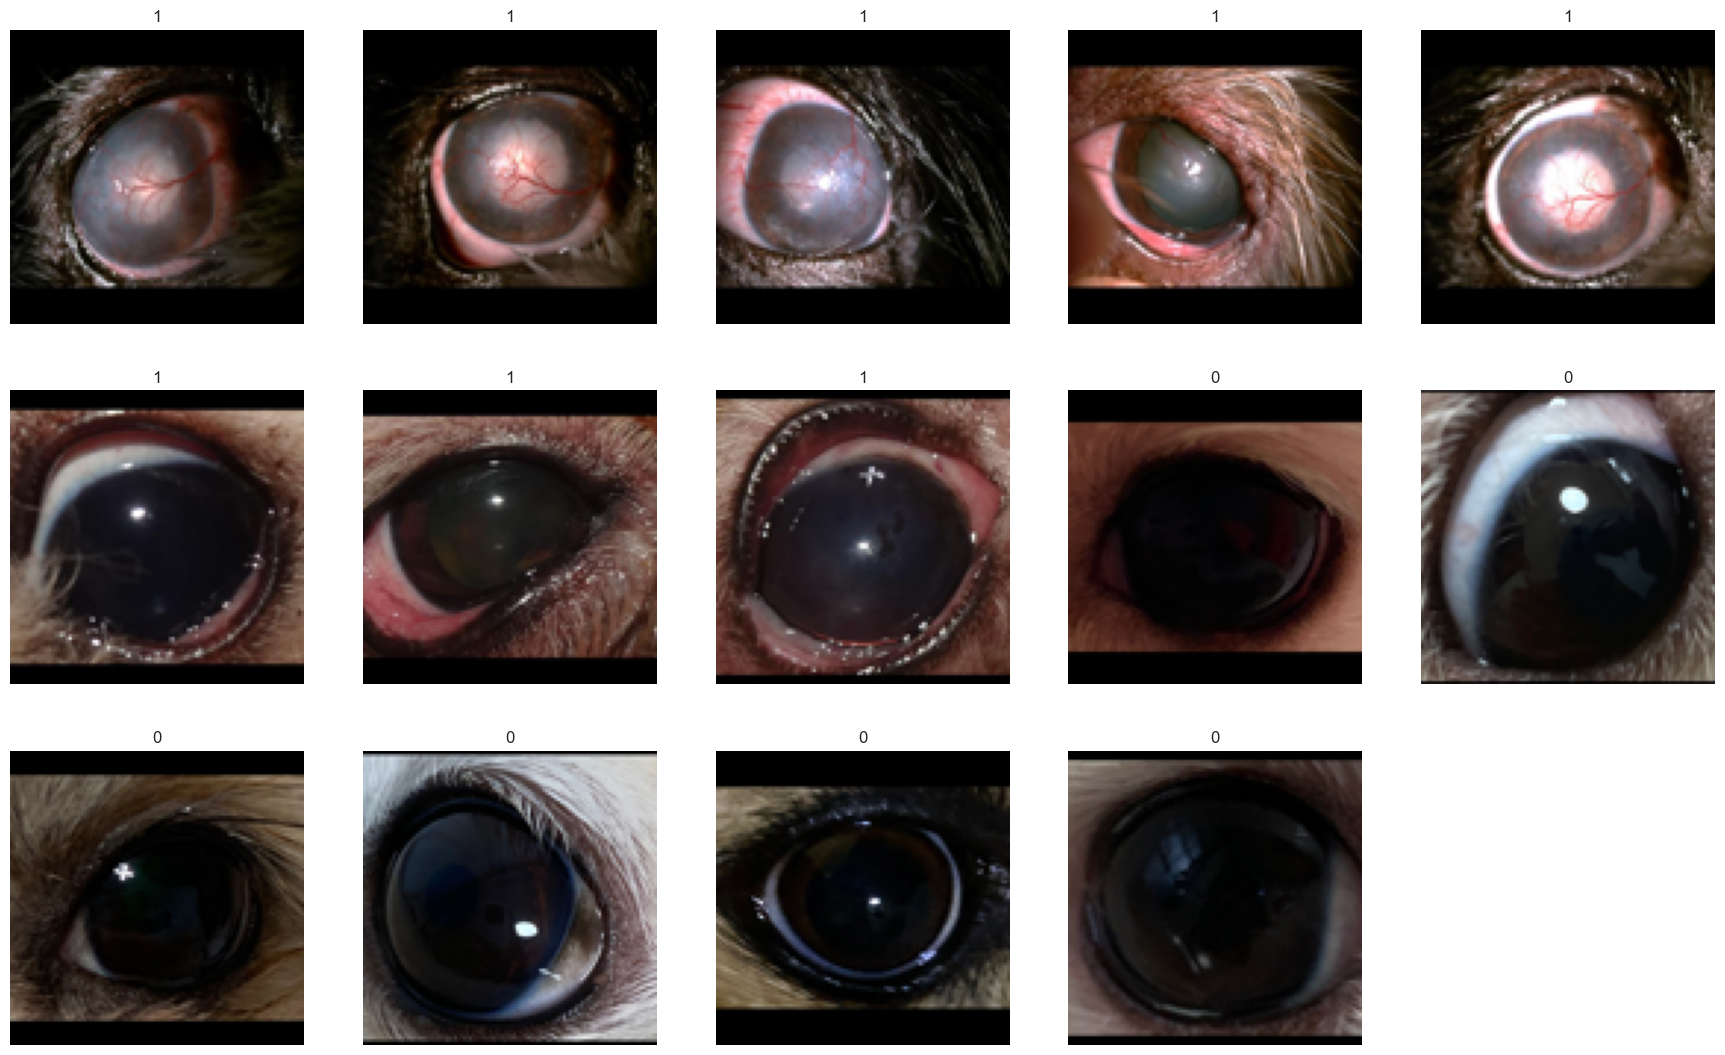

In [50]:
plt.figure(figsize=(22, 32))
for i in range(14):
    plt.subplot(7, 5, i + 1)
    #plt.imshow(np.squeeze(sample_data['image_pixel'][i])) # 이미지 데이터의 차원을 3차원에서 2차원으로 
    plt.imshow(df['image_pixel'][i])  # np.squeeze 안해도 잘 보임
    plt.title(df['path'][i])
    plt.axis("off")
plt.show();

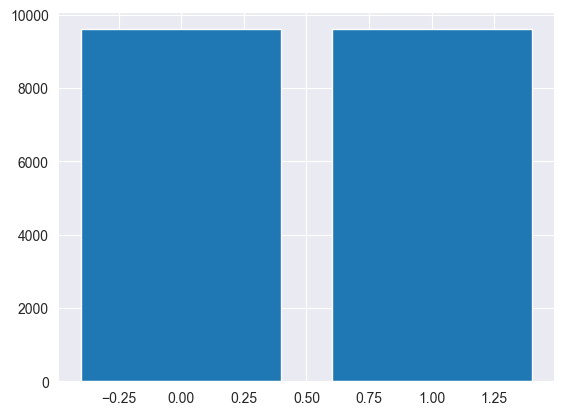

In [51]:
# Extract the x and y values from the groupby count
x_values = [0, 1]
y_values = df.groupby('path').size().values  # Use size() instead of count()

# Plot the bar chart
plt.bar(x_values, y_values)
plt.show()


In [52]:
df

,breed,age,gender,eye_position,lesions,label_disease_lv_1,label_disease_lv_2,label_disease_lv_3,img_path,image_pixel,path
0,시츄,12,0,0,결막염,1,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02f99e...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
1,시츄,13,0,0,결막염,1,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fa2f...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
2,시츄,12,0,0,결막염,1,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fa7d...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
3,시츄,11,1,0,결막염,1,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_02fb42...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
4,시츄,13,0,0,결막염,0,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D0_030750...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
...,...,...,...,...,...,...,...,...,...,...,...
19193,보스턴 테리어,6,0,0,결막염,1,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_316a65...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
19194,샤페이,3,0,1,결막염,1,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_316abf...,"[[[0, 1, 0], [0, 1, 0], [0, 0, 0], [0, 1, 0], ...",1
19195,믹스,10,1,1,결막염,0,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_319352...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
19196,시바,3,1,1,결막염,1,1,1,D:\반려동물 안구질환 데이터\1.Training\결막염\crop_D9_319ee6...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1


In [53]:
# 이미지 데이터를 numpy 형식으로 변환
X_aug = df['image_pixel'].to_numpy()
X_aug = np.stack(X_aug, axis=0)
Y_aug = np.array(df.iloc[:, -1:])
print(X_aug.shape)
print(Y_aug.shape)

(19198, 100, 100, 3)
(19198, 1)


## model

In [54]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_aug, Y_aug, test_size=0.2, random_state=3)

In [64]:
X_train.shape

(15358, 100, 100, 3)

In [65]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(X_test)

In [66]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size = (3,3), input_shape = [100, 100, 3], activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
    
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Flatten())
    #model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                  metrics = ['accuracy'])
    print(model.summary())
    return model

In [67]:
def train_model(model, X_train, Y_train, EPOCHS):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto')
    print("h1")
    print(f"x_train.shape {X_train.shape}")
    print(f"y_train.shape, {Y_train.shape}")
    history = model.fit(X_train, Y_train, validation_split=0.2, batch_size = 64, epochs = EPOCHS,
                        callbacks = [reduce_lr, early_stop])
    print("h2")
    return history

In [68]:
def plot_model_training_curve(history):
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Model Accuracy', 'Model Loss'])
    fig.add_trace(
        go.Scatter(
            y=history.history['accuracy'], name='train_acc'), row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_accuracy'], name='val_acc'), row=1, col=1)
    fig.add_trace(
        go.Scatter(
            y=history.history['loss'], name='train_loss'), row=1, col=2)
    fig.add_trace(
        go.Scatter(
            y=history.history['val_loss'], name='val_loss'), row=1, col=2)
    fig.show()

In [69]:
num_folds = 5
acc_per_fold=[]
loss_per_fold=[]
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)
fold_no=1
epochs = 50
model=create_model()

C:\aepython\eye_lesions\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 100, 100, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 50, 50, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,407 (1.14 MB)

 Trainable params: 298,407 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
for train,test in kfold.split(X_train, Y_train):
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history = train_model(model, X_train[train], Y_train[train],EPOCHS=epochs)
  plot_model_training_curve(history)

  scores = model.evaluate(X_train[test], Y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  model_file='skin_caner_5folds_'+str(fold_no)+'.h5'
  model.save(model_file)
  
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
h1
x_train.shape (12286, 100, 100, 3)
y_train.shape, (12286, 1)
Epoch 1/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.8720 - loss: 1.0784 - val_accuracy: 0.9752 - val_loss: 0.0885 - learning_rate: 0.0010
Epoch 2/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9778 - loss: 0.0706 - val_accuracy: 0.9809 - val_loss: 0.0760 - learning_rate: 0.0010
Epoch 3/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9870 - loss: 0.0451 - val_accuracy: 0.9467 - val_loss: 0.2425 - learning_rate: 0.0010
Epoch 4/50
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9872 - loss: 0.0380 - val_accuracy: 0.9776 - val_loss: 0.0861 - learning_rate: 0.0010
Epoch 5/50
 18/154 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9858 - loss: 0.0255